# importing the packages 

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

## importing the data 

In [2]:
data = pd.read_excel('C:/Users/Acer/Desktop/machine learning/excel data/Adidas US Sales Datasets.xlsx')
data.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


# EDA 

In [3]:
## the amount of data we have is acceptable to start with 
data.shape

(9648, 13)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 980.0+ KB


In [5]:
data.isnull().sum()

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

In [6]:
data.dtypes

Retailer                    object
Retailer ID                  int64
Invoice Date        datetime64[ns]
Region                      object
State                       object
City                        object
Product                     object
Price per Unit             float64
Units Sold                   int64
Total Sales                float64
Operating Profit           float64
Operating Margin           float64
Sales Method                object
dtype: object

In [7]:
data.describe().T

,count,mean,min,25%,50%,75%,max,std
Retailer ID,9648.0,1173849.72357,1128299.0,1185732.0,1185732.0,1185732.0,1197831.0,26360.377309
Invoice Date,9648,2021-05-10 15:20:44.776119296,2020-01-01 00:00:00,2021-02-17 00:00:00,2021-06-04 00:00:00,2021-09-16 00:00:00,2021-12-31 00:00:00,NaN
Price per Unit,9648.0,45.216625,7.0,35.0,45.0,55.0,110.0,14.705397
Units Sold,9648.0,256.930037,0.0,106.0,176.0,350.0,1275.0,214.25203
Total Sales,9648.0,93273.4375,0.0,4254.5,9576.0,150000.0,825000.0,141916.016727
Operating Profit,9648.0,34425.244761,0.0,1921.7525,4371.42,52062.5,390000.0,54193.113713
Operating Margin,9648.0,0.422991,0.1,0.35,0.41,0.49,0.8,0.097197


In [8]:
data['Region'].unique()

array(['Northeast', 'South', 'West', 'Midwest', 'Southeast'], dtype=object)

In [9]:
data['State'].unique()

array(['New York', 'Texas', 'California', 'Illinois', 'Pennsylvania',
       'Nevada', 'Colorado', 'Washington', 'Florida', 'Minnesota',
       'Montana', 'Tennessee', 'Nebraska', 'Alabama', 'Maine', 'Alaska',
       'Hawaii', 'Wyoming', 'Virginia', 'Michigan', 'Missouri', 'Utah',
       'Oregon', 'Louisiana', 'Idaho', 'Arizona', 'New Mexico', 'Georgia',
       'South Carolina', 'North Carolina', 'Ohio', 'Kentucky',
       'Mississippi', 'Arkansas', 'Oklahoma', 'Kansas', 'South Dakota',
       'North Dakota', 'Iowa', 'Wisconsin', 'Indiana', 'West Virginia',
       'Maryland', 'Delaware', 'New Jersey', 'Connecticut',
       'Rhode Island', 'Massachusetts', 'Vermont', 'New Hampshire'],
      dtype=object)

In [10]:
data['City'].unique()

array(['New York', 'Houston', 'San Francisco', 'Los Angeles', 'Chicago',
       'Dallas', 'Philadelphia', 'Las Vegas', 'Denver', 'Seattle',
       'Miami', 'Minneapolis', 'Billings', 'Knoxville', 'Omaha',
       'Birmingham', 'Portland', 'Anchorage', 'Honolulu', 'Orlando',
       'Albany', 'Cheyenne', 'Richmond', 'Detroit', 'St. Louis',
       'Salt Lake City', 'New Orleans', 'Boise', 'Phoenix', 'Albuquerque',
       'Atlanta', 'Charleston', 'Charlotte', 'Columbus', 'Louisville',
       'Jackson', 'Little Rock', 'Oklahoma City', 'Wichita',
       'Sioux Falls', 'Fargo', 'Des Moines', 'Milwaukee', 'Indianapolis',
       'Baltimore', 'Wilmington', 'Newark', 'Hartford', 'Providence',
       'Boston', 'Burlington', 'Manchester'], dtype=object)

In [11]:
data['Product'].unique()

array(["Men's Street Footwear", "Men's Athletic Footwear",
       "Women's Street Footwear", "Women's Athletic Footwear",
       "Men's Apparel", "Women's Apparel"], dtype=object)

In [12]:
## customerbuy online more than offline in the store 
data['Sales Method'].value_counts()

Sales Method
Online      4889
Outlet      3019
In-store    1740
Name: count, dtype: int64

In [13]:
## the sales for man and women clothes are the same 

data['Product'].value_counts()

Product
Men's Street Footwear        1610
Men's Athletic Footwear      1610
Women's Street Footwear      1608
Women's Apparel              1608
Women's Athletic Footwear    1606
Men's Apparel                1606
Name: count, dtype: int64

In [14]:
df = data.copy()

In [15]:
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'], format='%Y-%m-%d')

In [16]:
from  datetime import datetime
df['year'] = df['Invoice Date'].dt.year
df['month'] = df['Invoice Date'].dt.month
df['day'] = df['Invoice Date'].dt.day
df['weekday'] = df['Invoice Date'].dt.day_name().str.slice(0,3)

In [17]:
df.columns

Index(['Retailer', 'Retailer ID', 'Invoice Date', 'Region', 'State', 'City',
       'Product', 'Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin', 'Sales Method', 'year', 'month',
       'day', 'weekday'],
      dtype='object')

In [18]:
df = df.drop('Invoice Date', axis=1)
df

,Retailer,Retailer ID,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,year,month,day,weekday
0,Foot Locker,1185732,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.00,0.50,In-store,2020,1,1,Wed
1,Foot Locker,1185732,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.00,0.30,In-store,2020,1,2,Thu
2,Foot Locker,1185732,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.00,0.35,In-store,2020,1,3,Fri
3,Foot Locker,1185732,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.00,0.35,In-store,2020,1,4,Sat
4,Foot Locker,1185732,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.00,0.30,In-store,2020,1,5,Sun
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,Northeast,New Hampshire,Manchester,Men's Apparel,50.0,64,3200.0,896.00,0.28,Outlet,2021,1,24,Sun
9644,Foot Locker,1185732,Northeast,New Hampshire,Manchester,Women's Apparel,41.0,105,4305.0,1377.60,0.32,Outlet,2021,1,24,Sun
9645,Foot Locker,1185732,Northeast,New Hampshire,Manchester,Men's Street Footwear,41.0,184,7544.0,2791.28,0.37,Outlet,2021,2,22,Mon
9646,Foot Locker,1185732,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42.0,70,2940.0,1234.80,0.42,Outlet,2021,2,22,Mon


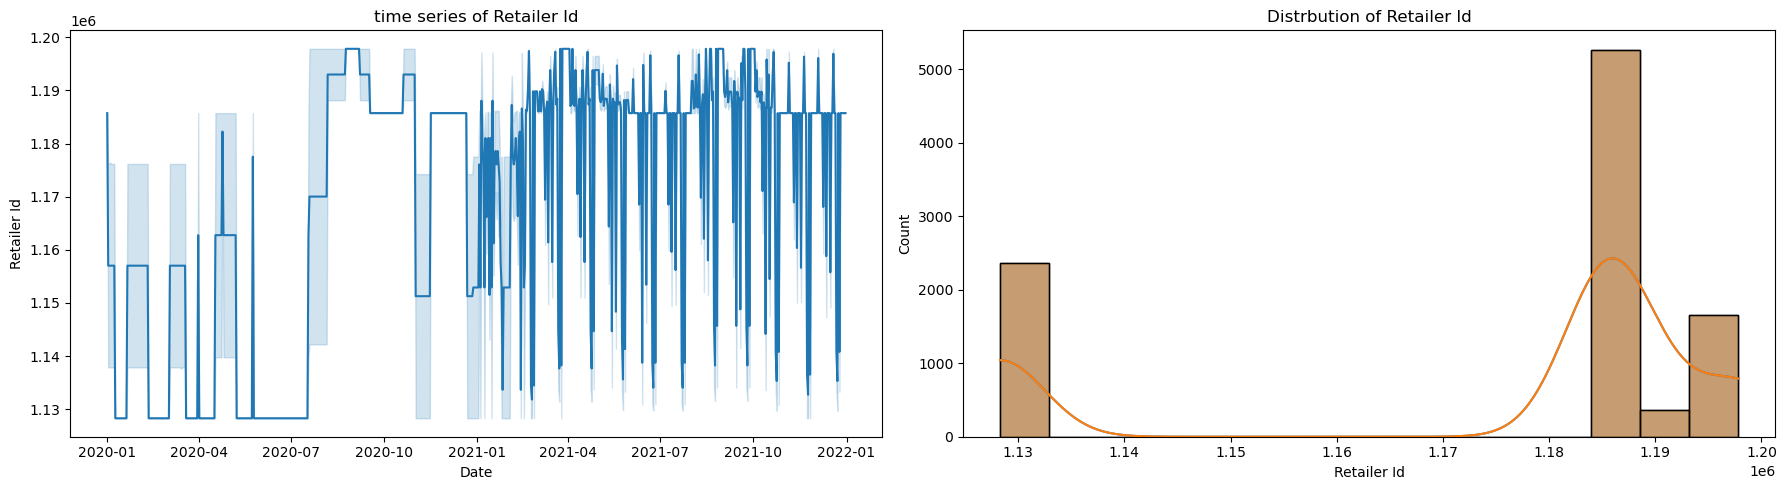

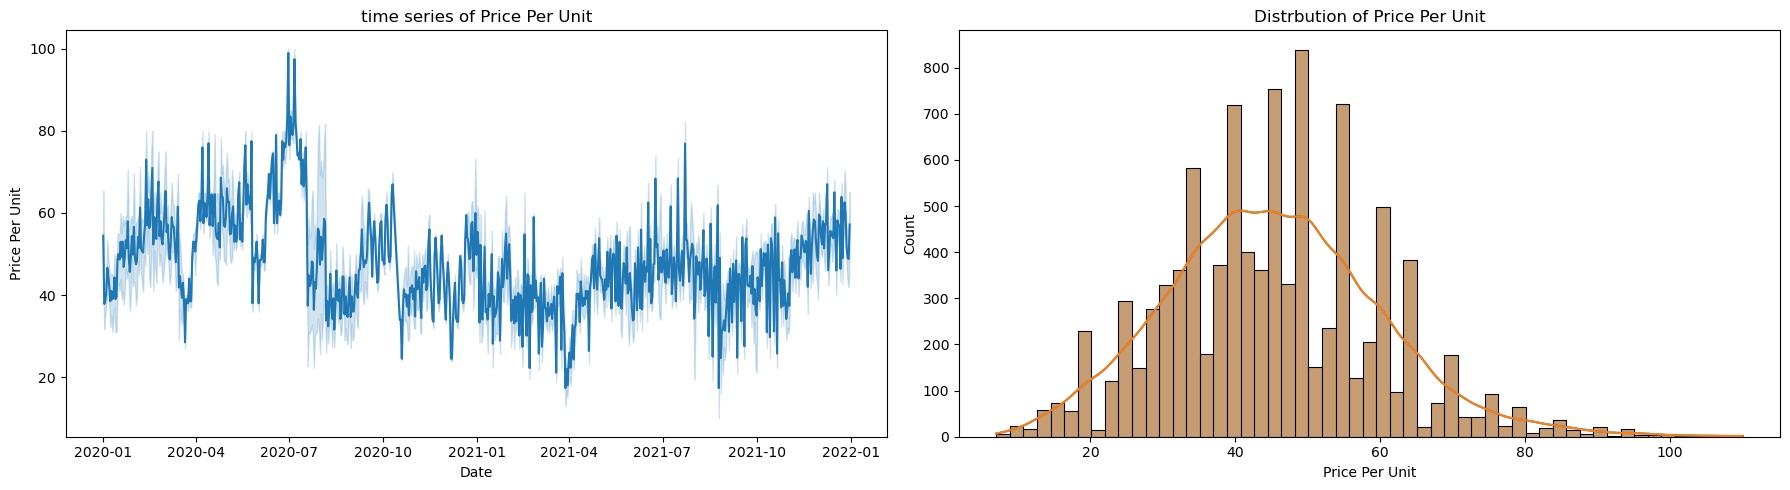

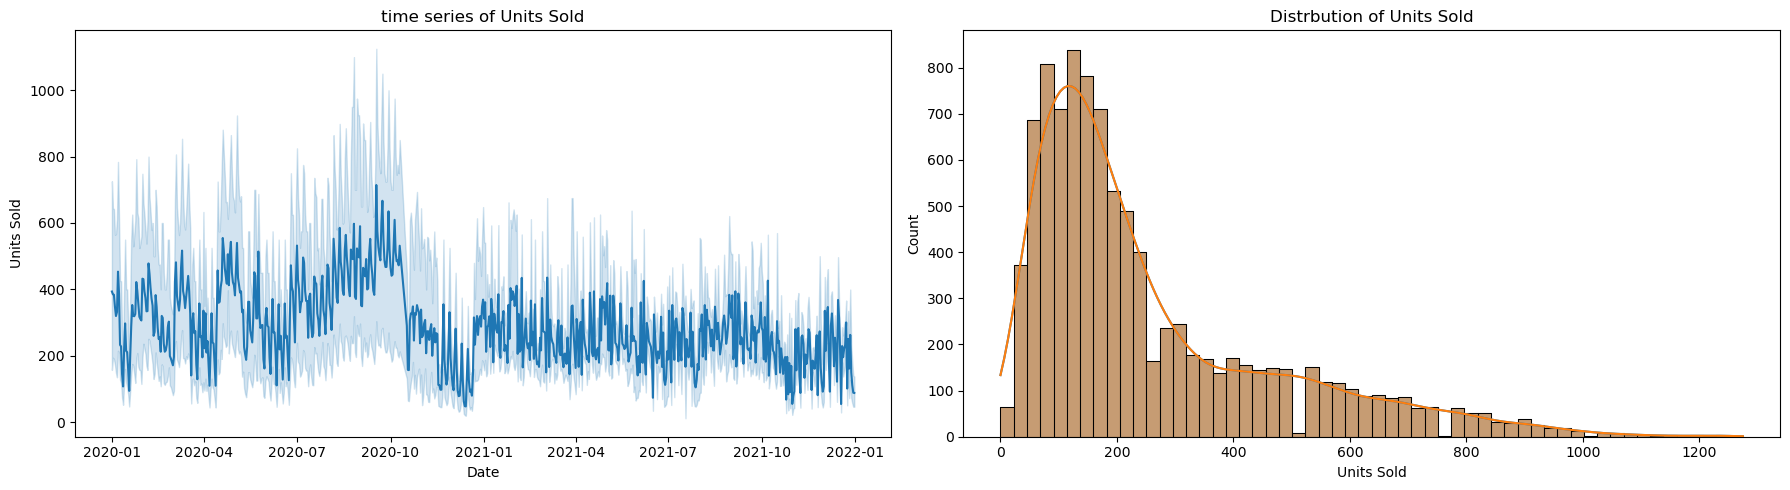

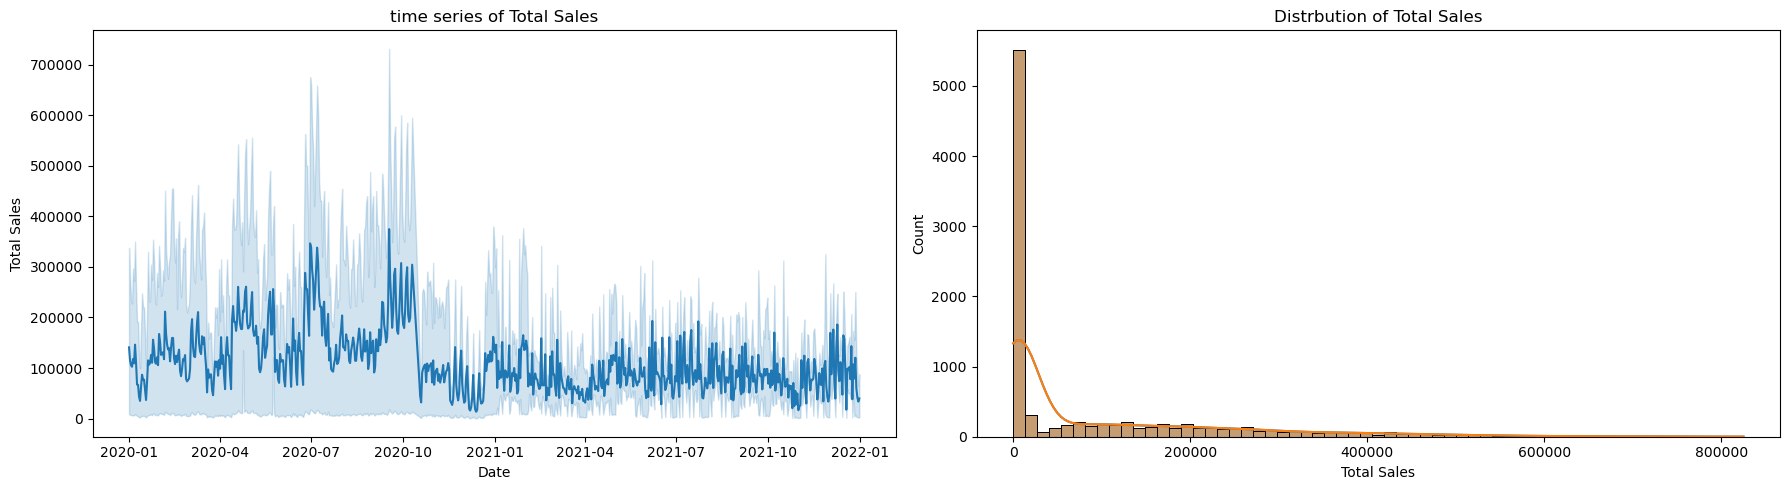

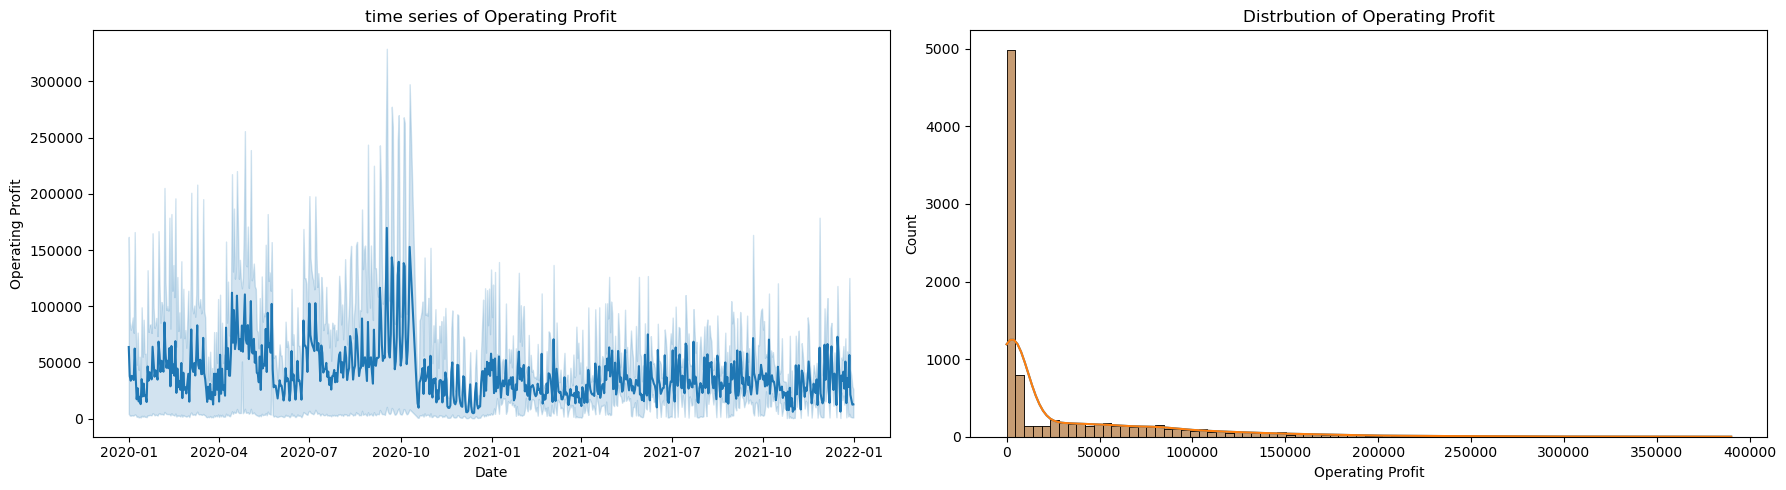

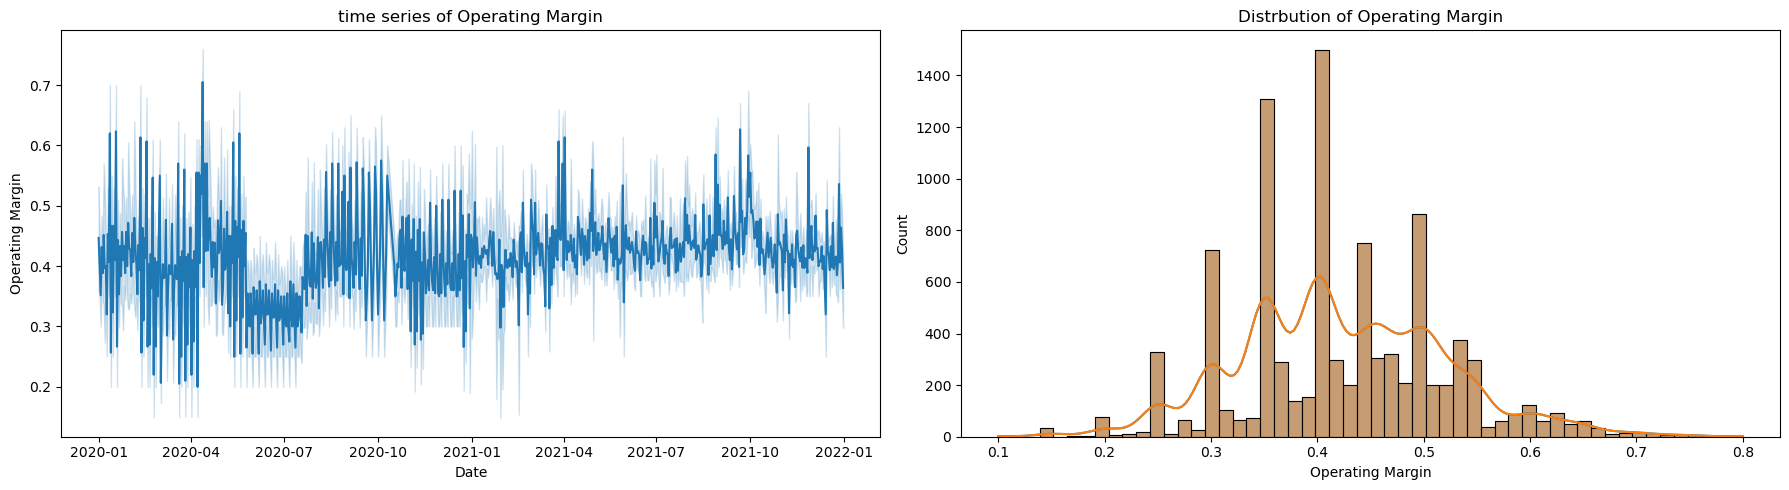

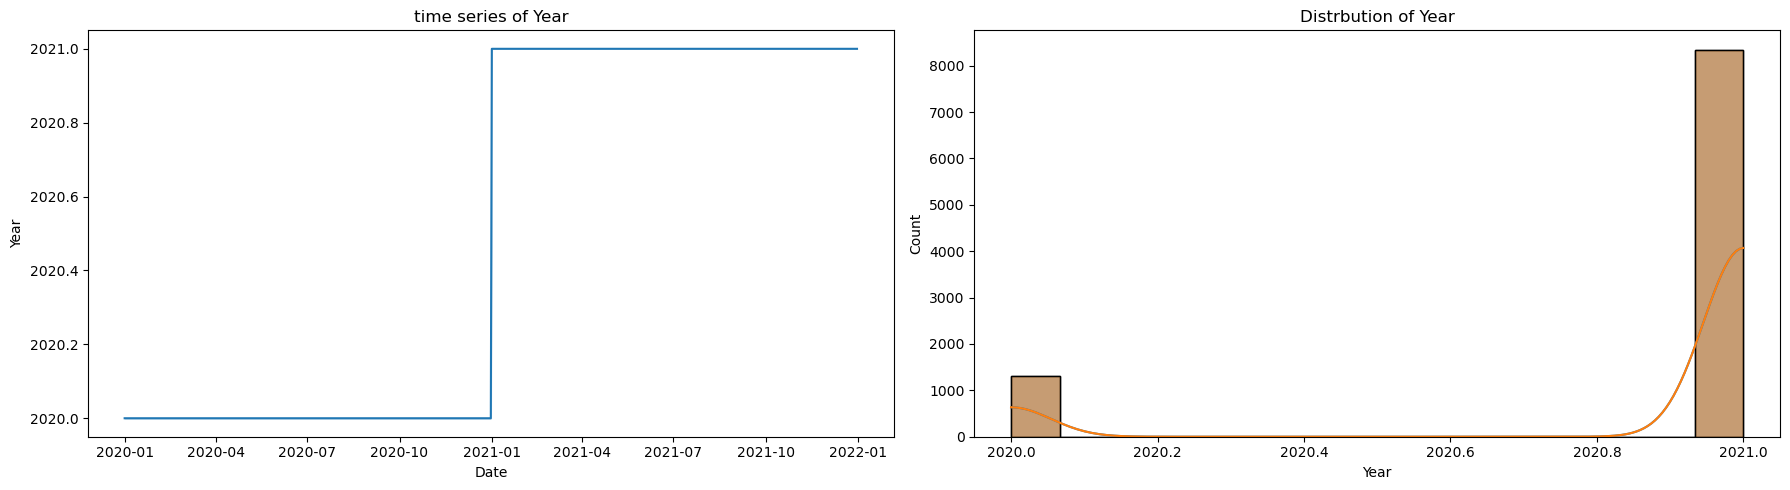

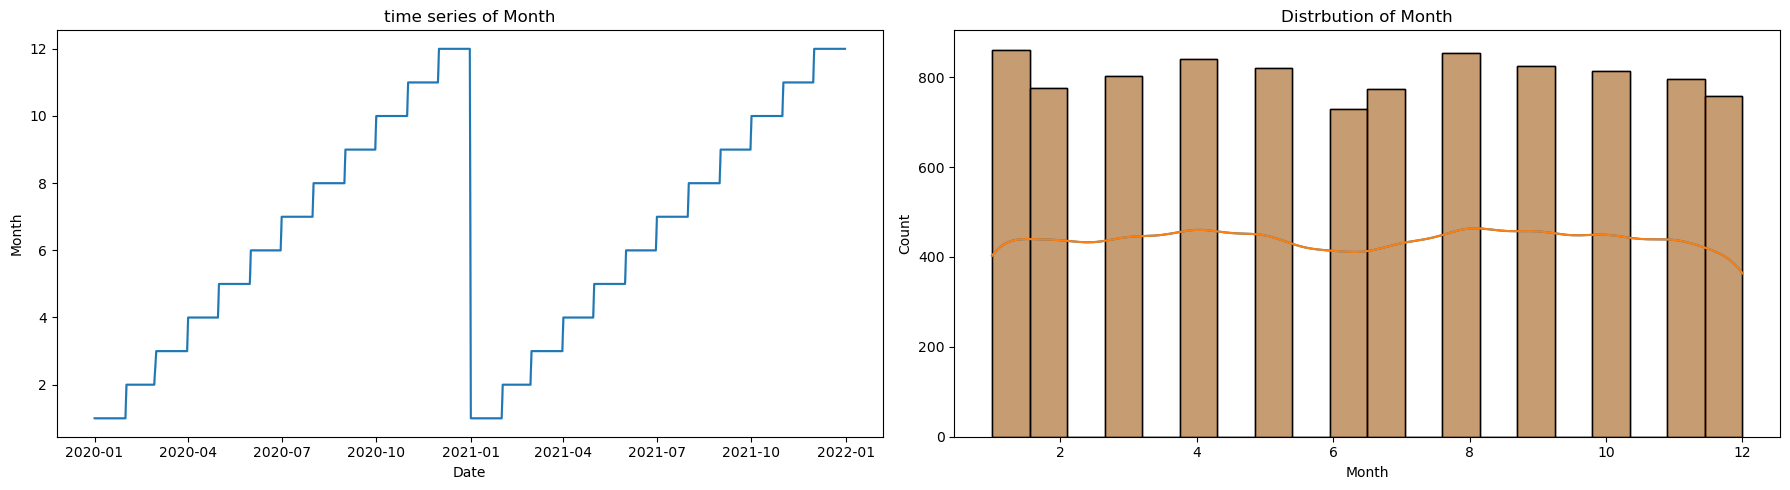

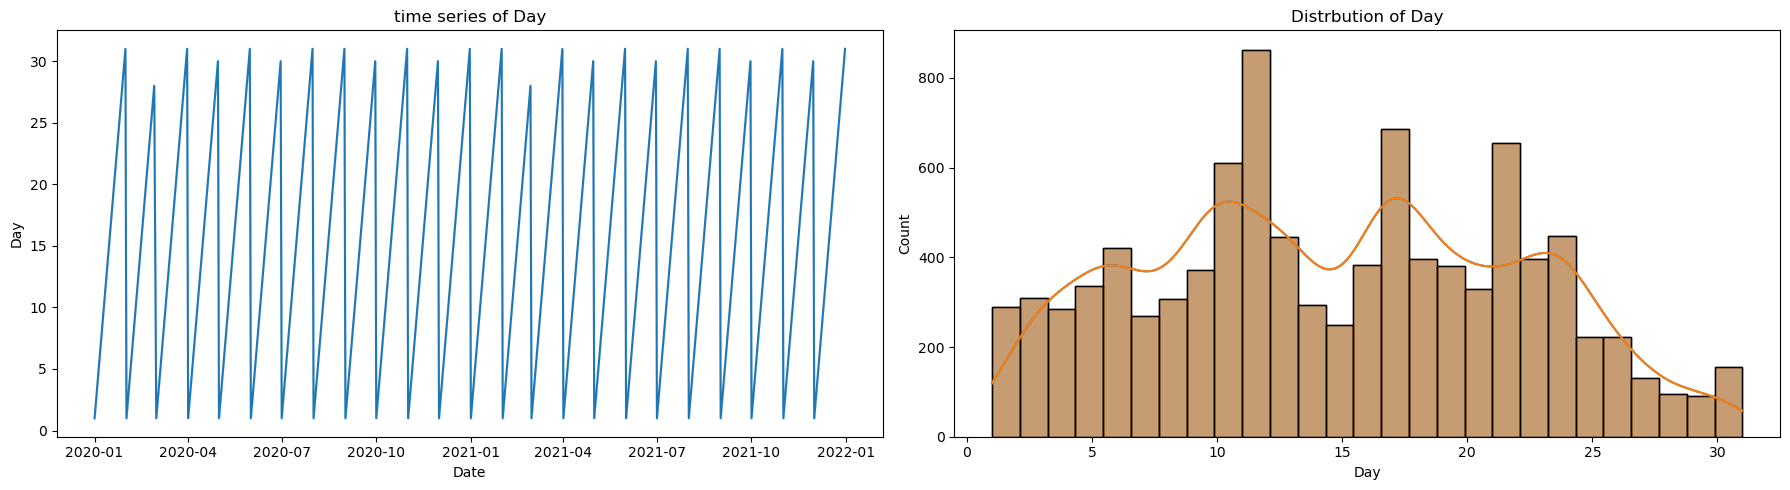

In [19]:
## select nummerical columns

numericals= df.select_dtypes(include='number').columns

for col in numericals:
    fig, axes = plt.subplots(1,2, figsize=(18,5))
    
    ax0 = sns.lineplot(
        x = pd.to_datetime(df[['year','month','day']]),
        y=col,
        data=df,
        ax=axes[0]
    )
    ax0.set_title(f'time series of {col.title()}')
    ax0.set_xlabel('Date')
    ax0.set_ylabel(col.title())
    
    
    ax1= sns.histplot(
        x=col,
        data=df,
        kde=True,
        ax=axes[1]
    )
    
    ax1=sns.histplot(
        x=col,
        data=df,
        kde=True,
        ax=axes[1]
    )
    
    ax1.set_title(f'Distrbution of {col.title()}')
    ax1.set_xlabel(col.title())
    
    plt.tight_layout()
    plt.show()
    


In [19]:
weakday_sales = df['weekday'].value_counts()
weakday_sales

weekday
Tue    1490
Fri    1426
Sat    1407
Sun    1390
Wed    1346
Thu    1343
Mon    1246
Name: count, dtype: int64

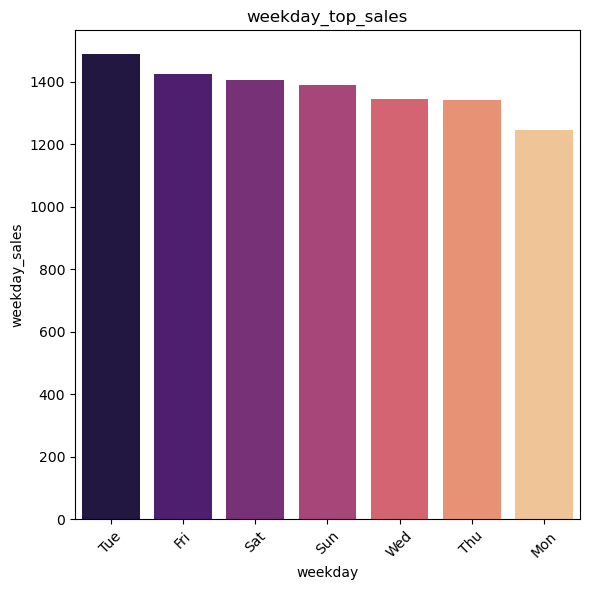

In [20]:
plt.figure(figsize=(6,6))
sns.barplot(x=weakday_sales.index, y=weakday_sales.values, palette='magma')


plt.xlabel('weekday')
plt.ylabel('weekday_sales')
plt.title('weekday_top_sales')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [21]:
month_sales = df['month'].value_counts()
month_sales

month
1     861
8     853
4     841
9     824
5     820
10    814
3     802
11    795
2     776
7     774
12    759
6     729
Name: count, dtype: int64

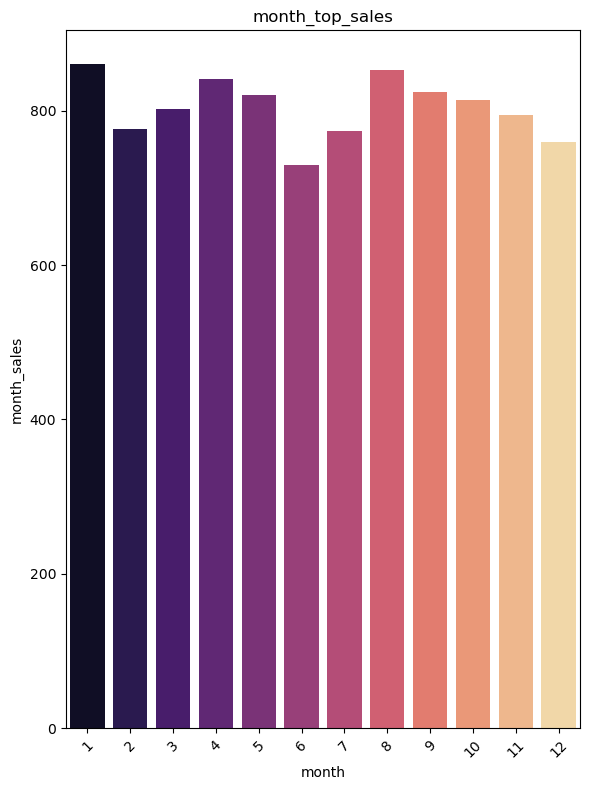

In [22]:
plt.figure(figsize=(6,8))
sns.barplot(x=month_sales.index, y=month_sales.values, palette='magma')

plt.xlabel('month')
plt.ylabel('month_sales')
plt.title('month_top_sales')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:
year_sales = df['year'].value_counts()
year_sales

year
2021    8346
2020    1302
Name: count, dtype: int64

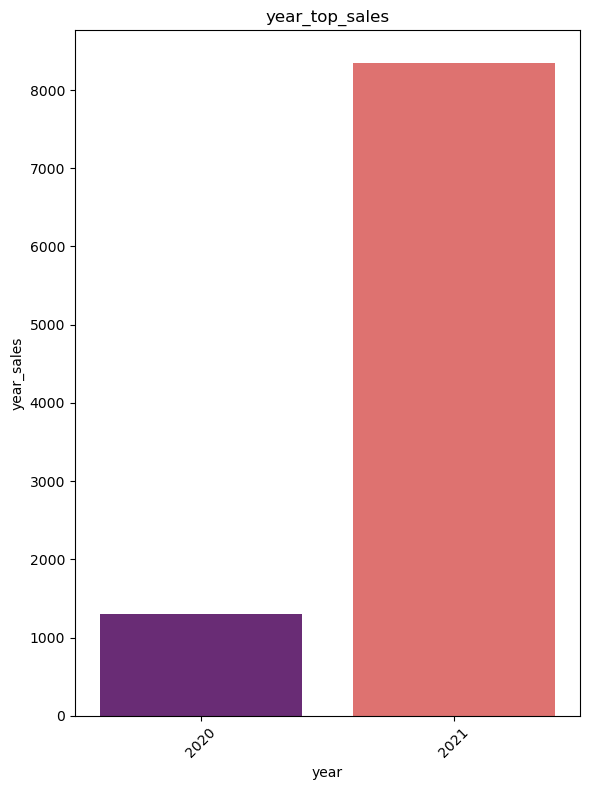

In [24]:
plt.figure(figsize=(6,8))
sns.barplot(x=year_sales.index, y=year_sales.values, palette='magma')

plt.xlabel('year')
plt.ylabel('year_sales')
plt.title('year_top_sales')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [25]:
city_sales = df['City'].value_counts()
city_sales

City
Portland          360
Charleston        288
Orlando           216
Salt Lake City    216
Houston           216
Boise             216
Phoenix           216
Albuquerque       216
Atlanta           216
New York          216
Jackson           216
Little Rock       216
Oklahoma City     216
Hartford          216
Providence        216
Boston            216
Burlington        216
Richmond          216
New Orleans       216
Manchester        216
Dallas            216
Philadelphia      216
Knoxville         216
Birmingham        216
Las Vegas         216
Los Angeles       216
San Francisco     216
Chicago           144
Newark            144
Baltimore         144
Indianapolis      144
Milwaukee         144
Des Moines        144
Fargo             144
Sioux Falls       144
Wichita           144
Wilmington        144
Honolulu          144
Albany            144
Louisville        144
Columbus          144
Charlotte         144
Seattle           144
Miami             144
Minneapolis       144
Billi

In [26]:
state_sales = df['State'].value_counts()
state_sales

State
California        432
Texas             432
New York          360
Florida           360
Mississippi       216
Oregon            216
Louisiana         216
Idaho             216
New Mexico        216
Georgia           216
Arkansas          216
Virginia          216
Oklahoma          216
Connecticut       216
Rhode Island      216
Massachusetts     216
Vermont           216
Utah              216
Arizona           216
New Hampshire     216
Pennsylvania      216
Nevada            216
Alabama           216
Tennessee         216
South Dakota      144
Illinois          144
Colorado          144
New Jersey        144
Delaware          144
Maryland          144
West Virginia     144
Indiana           144
Wisconsin         144
Iowa              144
North Dakota      144
Michigan          144
Kansas            144
Missouri          144
Minnesota         144
Montana           144
Kentucky          144
Ohio              144
North Carolina    144
South Carolina    144
Nebraska          144
Main

In [27]:
###############################

In [28]:
df.columns

Index(['Retailer', 'Retailer ID', 'Region', 'State', 'City', 'Product',
       'Price per Unit', 'Units Sold', 'Total Sales', 'Operating Profit',
       'Operating Margin', 'Sales Method', 'year', 'month', 'day', 'weekday'],
      dtype='object')

In [29]:
df.dtypes

Retailer             object
Retailer ID           int64
Region               object
State                object
City                 object
Product              object
Price per Unit      float64
Units Sold            int64
Total Sales         float64
Operating Profit    float64
Operating Margin    float64
Sales Method         object
year                  int32
month                 int32
day                   int32
weekday              object
dtype: object

In [30]:
df = df.drop_duplicates()


cols_to_convert = ['Price per Unit','Units Sold']
df[cols_to_convert] = df[cols_to_convert].astype(float)

In [31]:
df.describe()

,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,year,month,day
count,9.648000e+03,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,1.173850e+06,45.216625,256.930037,93273.437500,34425.244761,0.422991,2020.865050,6.458126,14.696310
std,2.636038e+04,14.705397,214.252030,141916.016727,54193.113713,0.097197,0.341688,3.454799,7.348019
min,1.128299e+06,7.000000,0.000000,0.000000,0.000000,0.100000,2020.000000,1.000000,1.000000
25%,1.185732e+06,35.000000,106.000000,4254.500000,1921.752500,0.350000,2021.000000,3.000000,9.000000
50%,1.185732e+06,45.000000,176.000000,9576.000000,4371.420000,0.410000,2021.000000,6.000000,15.000000
75%,1.185732e+06,55.000000,350.000000,150000.000000,52062.500000,0.490000,2021.000000,9.000000,21.000000
max,1.197831e+06,110.000000,1275.000000,825000.000000,390000.000000,0.800000,2021.000000,12.000000,31.000000


<Axes: xlabel='Retailer', ylabel='Total Sales'>

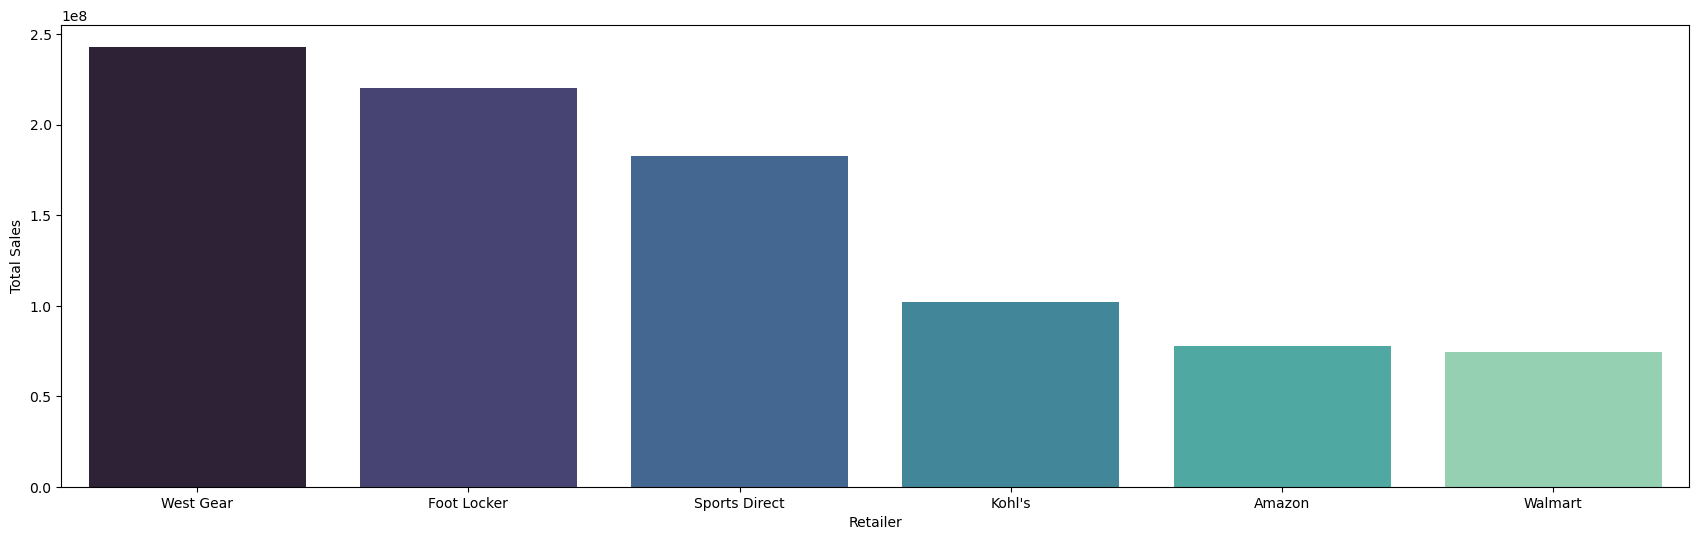

In [32]:
plt.figure(figsize=(21,6))
sales_by_retailer = df.groupby('Retailer').sum().sort_values('Total Sales', ascending=False).head(15)
sales_by_retailer['Total Sales'] = sales_by_retailer['Total Sales'].round(2)
sales_by_retailer['Retailer'] = sales_by_retailer.index
sns.barplot(x='Retailer', y='Total Sales', data=sales_by_retailer, palette = 'mako')

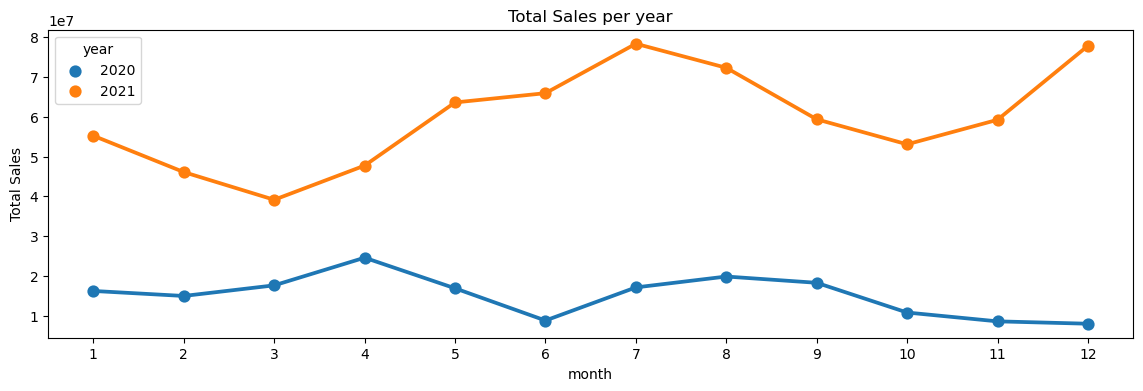

In [33]:
plt.figure(figsize=(14,4))

a = pd.DataFrame(df.groupby(by=['year','month']).sum()).reset_index()
sns.pointplot(x='month', y='Total Sales', hue='year', data=a)

plt.xlabel('month')
plt.ylabel('Total Sales')
plt.title('Total Sales per year')

plt.show()

<Axes: xlabel='Region', ylabel='Total Sales'>

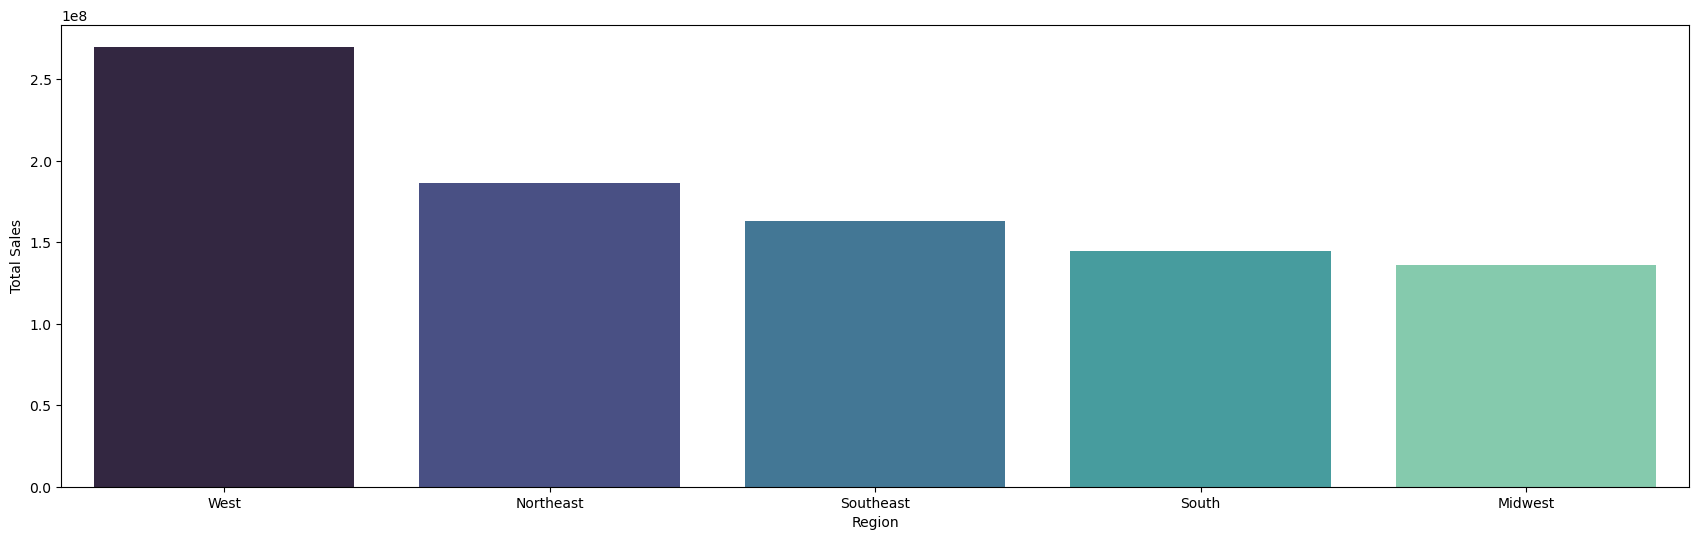

In [34]:
plt.figure(figsize=(21,6))

sales_by_region =df.groupby('Region').sum().sort_values('Total Sales', ascending=False).head(15)
sales_by_region['Total Sales']= sales_by_region['Total Sales'].round(2)
sales_by_region['Region']= sales_by_region.index
sns.barplot(x='Region', y='Total Sales', data=sales_by_region, palette='mako')

<Axes: xlabel='Product', ylabel='Total Sales'>

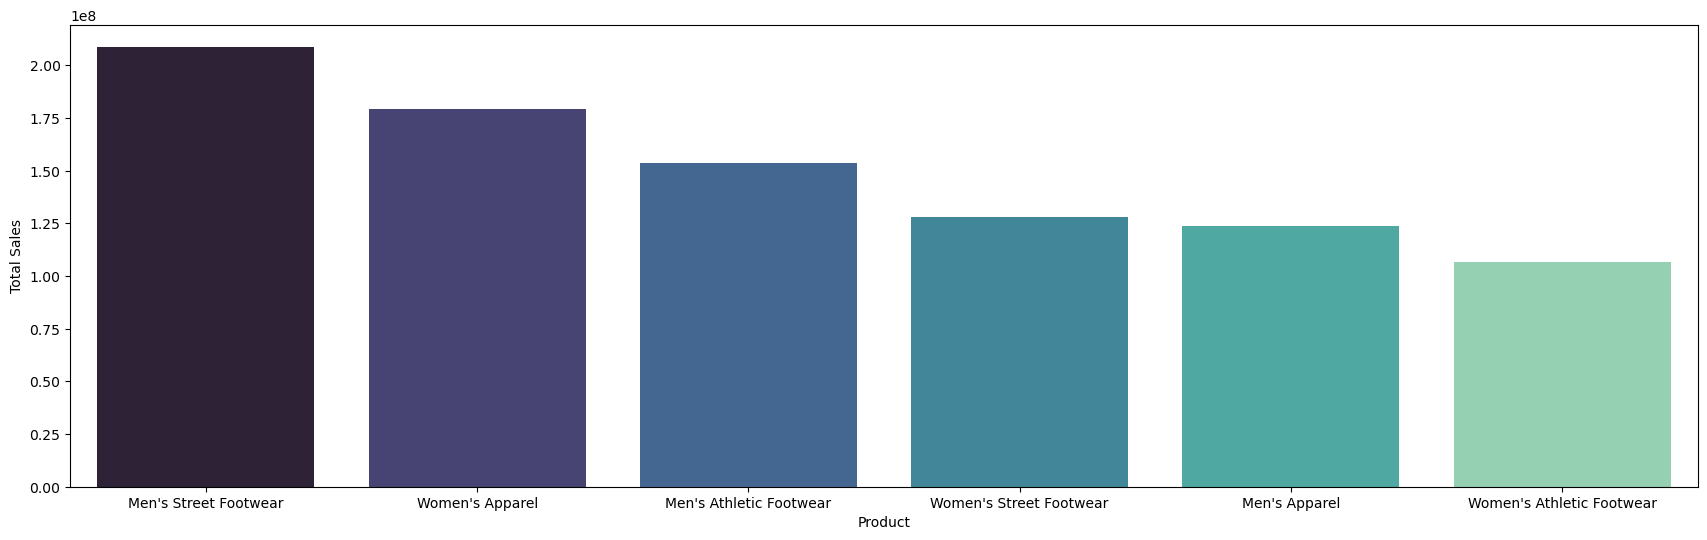

In [35]:
plt.figure(figsize=(21,6))

sales_by_Product =df.groupby('Product').sum().sort_values('Total Sales', ascending=False).head(15)
sales_by_Product['Total Sales']= sales_by_Product['Total Sales'].round(2)
sales_by_Product['Product']= sales_by_Product.index
sns.barplot(x='Product', y='Total Sales', data=sales_by_Product, palette='mako')

<Axes: xlabel='Sales Method', ylabel='Total Sales'>

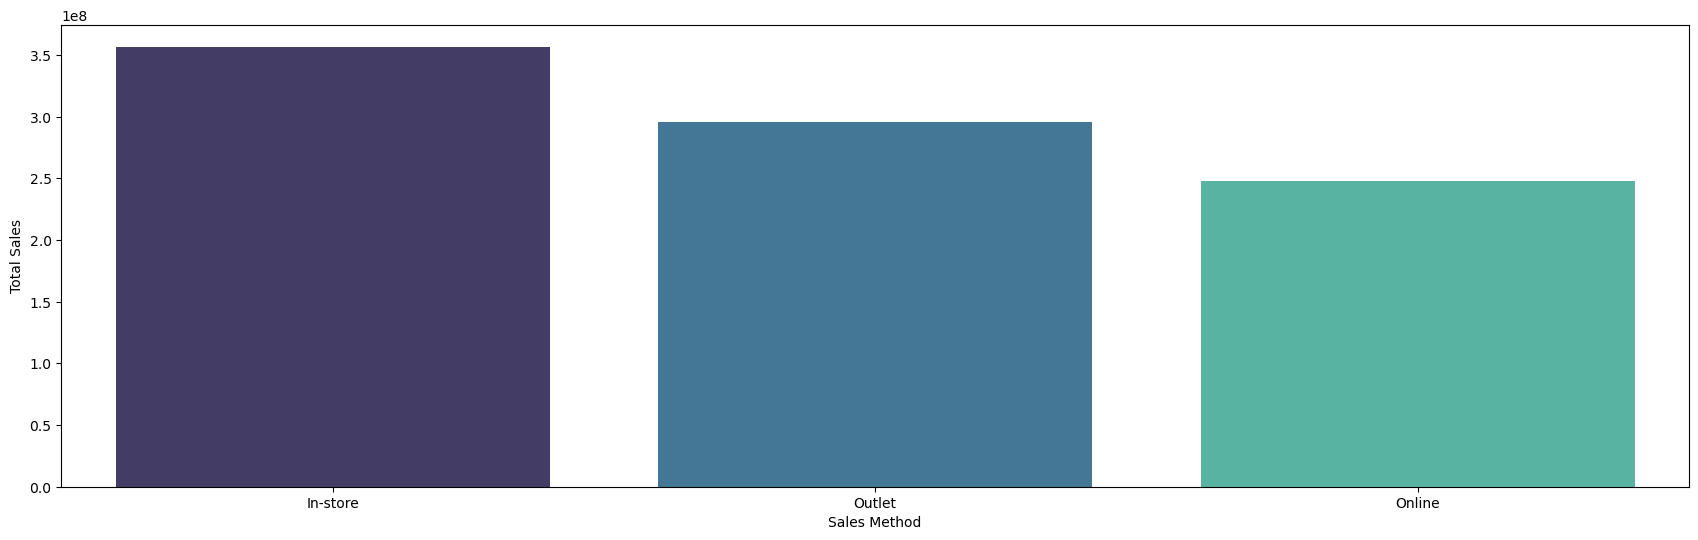

In [36]:
plt.figure(figsize=(21,6))

sales_by_Sales_Method =df.groupby('Sales Method').sum().sort_values('Total Sales', ascending=False).head(15)
sales_by_Sales_Method['Total Sales']= sales_by_Sales_Method['Total Sales'].round(2)
sales_by_Sales_Method['Sales Method']= sales_by_Sales_Method.index
sns.barplot(x='Sales Method', y='Total Sales', data=sales_by_Sales_Method, palette='mako')

In [38]:
# T-test
sales_data = df.copy()

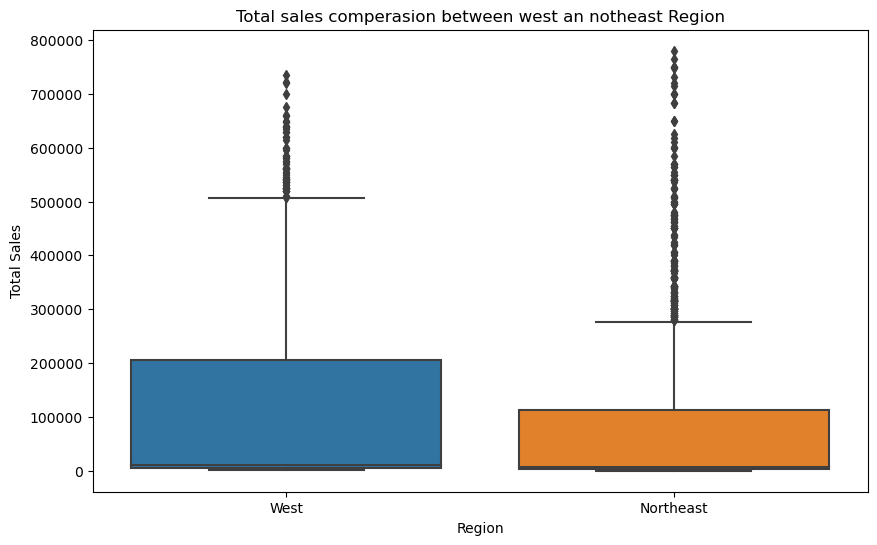

In [48]:
west_region_data = sales_data[sales_data['Region'] == 'West']['Total Sales']
notheast_region_data = sales_data[sales_data['Region']=='Northeast']['Total Sales']

region_data = pd.concat([west_region_data, notheast_region_data],axis=0, keys=['West','Northeast']).reset_index(level=0).rename(columns={'level_0':'Region'})

plt.figure(figsize=(10,6))
sns.boxplot(x='Region', y='Total Sales', data=region_data)
plt.title('Total sales comperasion between west an notheast Region')
plt.ylabel('Total Sales')
plt.show()

In [52]:
t_stat_west_northeast, p_value_west_northeast = stats.ttest_ind(west_region_data,
                                                               notheast_region_data, nan_policy='omit')
t_stat_west_northeast, p_value_west_northeast

(7.761202284383056, 1.0200953767467657e-14)

## Analysis and Insights:
Significance: The p-value is significantly less than 0.05, indicating a real difference in sales between the "West" and "Northeast" regions. Business Implications: The West region appears to have higher sales compared to the Northeast region. This could be due to differences in consumer behavior, marketing strategies, competition, or other regional factors. Recommendations: Investigate the underlying causes of this difference. Are there specific products or categories that perform particularly well in the West? Is there a difference in marketing or distribution that could be optimized? Understanding the root causes can lead to actionable strategies to enhance sales performance in both regions.

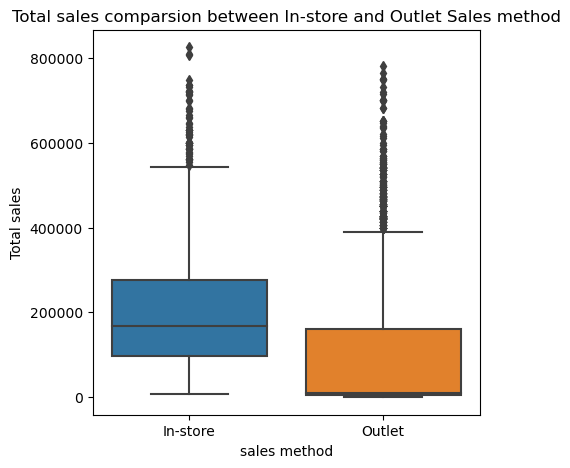

In [55]:
In_store_data = sales_data[sales_data['Sales Method']== 'In-store']['Total Sales']
outlet_data = sales_data[sales_data['Sales Method']== 'Outlet']['Total Sales']

sales_method_data = pd.concat([In_store_data, outlet_data], axis=1,keys=['In-store','Outlet'])

plt.figure(figsize=(5,5))
sns.boxplot(data=sales_method_data)
plt.title('Total sales comparsion between In-store and Outlet Sales method')
plt.ylabel('Total sales')
plt.xlabel('sales method')
plt.show()

In [56]:
t_statistic, p_value = stats.ttest_ind(In_store_data, outlet_data)

print('T-statistic:', t_statistic)
print('P-values:', p_value)

T-statistic: 23.951259164563925
P-values: 8.596978515235122e-120


# Prediction 

In [61]:
data_1=sales_data.copy()

In [62]:
data_1.head(3)

,Retailer,Retailer ID,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,year,month,day,weekday
0,Foot Locker,1185732,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,600000.0,300000.0,0.50,In-store,2020,1,1,Wed
1,Foot Locker,1185732,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000.0,500000.0,150000.0,0.30,In-store,2020,1,2,Thu
2,Foot Locker,1185732,Northeast,New York,New York,Women's Street Footwear,40.0,1000.0,400000.0,140000.0,0.35,In-store,2020,1,3,Fri


In [63]:
data_1 = data_1.drop(['Retailer ID','day','City','weekday'], axis=1)
data_1.head(3)

,Retailer,Region,State,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,year,month
0,Foot Locker,Northeast,New York,Men's Street Footwear,50.0,1200.0,600000.0,300000.0,0.50,In-store,2020,1
1,Foot Locker,Northeast,New York,Men's Athletic Footwear,50.0,1000.0,500000.0,150000.0,0.30,In-store,2020,1
2,Foot Locker,Northeast,New York,Women's Street Footwear,40.0,1000.0,400000.0,140000.0,0.35,In-store,2020,1


In [64]:
data_1['Sales Method'].unique()

array(['In-store', 'Outlet', 'Online'], dtype=object)

In [65]:
data_1['Sales Method'] = data_1['Sales Method'].map({'In-store':0,'Outlet':1,'Online':2})
data_1['Sales Method']

0       0
1       0
2       0
3       0
4       0
       ..
9643    1
9644    1
9645    1
9646    1
9647    1
Name: Sales Method, Length: 9648, dtype: int64

In [67]:
data_1 = pd.get_dummies(data_1, columns=['Retailer','Region','State','Product'], drop_first=True)
data_1

,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,year,month,Retailer_Foot Locker,Retailer_Kohl's,...,State_Virginia,State_Washington,State_West Virginia,State_Wisconsin,State_Wyoming,Product_Men's Athletic Footwear,Product_Men's Street Footwear,Product_Women's Apparel,Product_Women's Athletic Footwear,Product_Women's Street Footwear
0,50.0,1200.0,600000.0,300000.00,0.50,0,2020,1,True,False,...,False,False,False,False,False,False,True,False,False,False
1,50.0,1000.0,500000.0,150000.00,0.30,0,2020,1,True,False,...,False,False,False,False,False,True,False,False,False,False
2,40.0,1000.0,400000.0,140000.00,0.35,0,2020,1,True,False,...,False,False,False,False,False,False,False,False,False,True
3,45.0,850.0,382500.0,133875.00,0.35,0,2020,1,True,False,...,False,False,False,False,False,False,False,False,True,False
4,60.0,900.0,540000.0,162000.00,0.30,0,2020,1,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,50.0,64.0,3200.0,896.00,0.28,1,2021,1,True,False,...,False,False,False,False,False,False,False,False,False,False
9644,41.0,105.0,4305.0,1377.60,0.32,1,2021,1,True,False,...,False,False,False,False,False,False,False,True,False,False
9645,41.0,184.0,7544.0,2791.28,0.37,1,2021,2,True,False,...,False,False,False,False,False,False,True,False,False,False
9646,42.0,70.0,2940.0,1234.80,0.42,1,2021,2,True,False,...,False,False,False,False,False,True,False,False,False,False


In [68]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_1)

In [69]:
scaled_df = pd.DataFrame(scaled_data, columns=data_1.columns)
scaled_df

,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,year,month,Retailer_Foot Locker,Retailer_Kohl's,...,State_Virginia,State_Washington,State_West Virginia,State_Wisconsin,State_Wyoming,Product_Men's Athletic Footwear,Product_Men's Street Footwear,Product_Women's Apparel,Product_Women's Athletic Footwear,Product_Women's Street Footwear
0,0.417476,0.941176,0.727273,0.769231,0.571429,0.0,0.0,0.000000,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.417476,0.784314,0.606061,0.384615,0.285714,0.0,0.0,0.000000,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.320388,0.784314,0.484848,0.358974,0.357143,0.0,0.0,0.000000,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.368932,0.666667,0.463636,0.343269,0.357143,0.0,0.0,0.000000,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.514563,0.705882,0.654545,0.415385,0.285714,0.0,0.0,0.000000,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,0.417476,0.050196,0.003879,0.002297,0.257143,0.5,1.0,0.000000,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9644,0.330097,0.082353,0.005218,0.003532,0.314286,0.5,1.0,0.000000,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9645,0.330097,0.144314,0.009144,0.007157,0.385714,0.5,1.0,0.090909,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9646,0.339806,0.054902,0.003564,0.003166,0.457143,0.5,1.0,0.090909,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [70]:
## define x and y
X = scaled_df.drop(columns=['Total Sales'])
y = scaled_df['Total Sales']

In [71]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [73]:
y_pred_ran = rf.predict(X_test)

In [75]:
mse = mean_squared_error(y_test, y_pred_ran)
mae = mean_absolute_error(y_test, y_pred_ran)
r2 = r2_score(y_test, y_pred_ran)

print(f'mean_square_error:{mse}')
print(f'mean_absolute_error: {mae}')
print(f'r^2: {r2}')

mean_square_error:2.9587461553012017e-05
mean_absolute_error: 0.0010020518637148745
r^2: 0.9990126857666692


In [77]:
param_grid={
    'n_estimators':[100,200,300],
    'max_depth':[10,20,None],
    'min_samples_split':[2,5,10]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, verbose=2)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   9.8s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=  16.6s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=  24.2s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=  12.5s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=  19.1s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=  26.6s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=  26.6s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=  18.0s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=  16.8s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=  15.4s
[CV] END max_depth=10, min_samples_split=2, n_estimators=300; total time=  23.5s
[CV] END max_depth=10, min_samples_split=2, n_e

In [78]:
best_rf

RandomForestRegressor(max_depth=20, n_estimators=300, random_state=42)

In [80]:
y_pred_best = best_rf.predict(X_test)

mse_best = mean_squared_error(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)


print(f'Best Model Mean Squared Error: {mse_best}')
print(f'Best Model Mean Absolute Error: {mae_best}')
print(f'Best Model R² Score: {r2_best}')


Best Model Mean Squared Error: 3.061988611032066e-05
Best Model Mean Absolute Error: 0.0010050910222196509
Best Model R² Score: 0.9989782344346939


In [85]:
feature_important = best_rf.feature_importances_

importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': feature_important
}).sort_values(by='importance', ascending=False)

importance_df.head(5)

#importance_df.plot(kind='bar', x='feature', y='importance', title='feature importance')
#plt.show()

,feature,importance
2,Operating Profit,0.945343
3,Operating Margin,0.050787
0,Price per Unit,0.001470
1,Units Sold,0.001181
6,month,0.000241
